<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_4/AST_Clase_4_ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 4</h3>
    <h3>Ejercicio 1</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno / Fernando Martínez<p> 
</div>

# INICIO / PREPARACION DE BASE  <br>

Datos de sobre "Entrada total de visitantes a un Parque Nacional con cualquier finalidad principal -ocio, negocios u otro motivo personal- que no sea ser empleado por el Parque"  <br>

Fuente = https://datos.yvera.gob.ar/series/api/series/?ids=pn_visitantes_total


In [ ]:
# pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.8 MB/s 
     |████████████████████████████████| 9.8 MB 9.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
from pmdarima import auto_arima

ModuleNotFoundError: ignored

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/serie-tiempo-parques-nacionales-mensual.csv'
dataoriginal = pd.read_csv(url)

In [ ]:
data=dataoriginal.copy()

In [ ]:
data

,indice_tiempo,no_residentes,residentes,total,buenos_aires_no_residentes,buenos_aires_residentes,buenos_aires_total,cordoba_no_residentes,cordoba_residentes,cordoba_total,...,cuyo_total,litoral_no_residentes,litoral_residentes,litoral_total,norte_no_residentes,norte_residentes,norte_total,patagonia_no_residentes,patagonia_residentes,patagonia_total
0,2008-01-01,198407,352303,550710,0,885,885,145,717,862,...,5144,55335,111408,166743,774,4241,5016,141973,230087,372060
1,2008-02-01,151809,283145,434953,0,624,624,148,475,623,...,4942,53596,85853,139449,1294,5099,6393,96632,186291,282923
2,2008-03-01,148533,173134,321667,0,0,0,147,741,888,...,5900,55130,59150,114280,1696,9204,10900,91382,98317,189699
3,2008-04-01,68558,61539,130097,0,462,462,166,539,705,...,1808,30827,23821,54648,728,3867,4595,36759,31121,67879
4,2008-05-01,43751,48787,92538,0,1091,1091,129,608,737,...,2402,29818,28538,58356,663,5083,5746,13038,11169,24206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2021-08-01,380,137039,137419,4,1405,1409,3,1195,1198,...,1091,142,60500,60642,136,14254,14390,91,58598,58689
164,2021-09-01,229,163297,163526,2,1077,1079,9,1377,1386,...,1216,142,71173,71315,5,9669,9674,70,78786,78856
165,2021-10-01,1830,269601,271431,0,2008,2008,17,2076,2093,...,2302,1466,111278,112744,11,24718,24729,332,127223,127555
166,2021-11-01,12337,256047,268384,0,1179,1179,8,683,691,...,17,6290,99745,106035,93,16965,17058,5946,137458,143404


In [ ]:
data.fecha = pd.to_datetime(data.indice_tiempo, dayfirst = True) 
data.set_index("indice_tiempo", inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


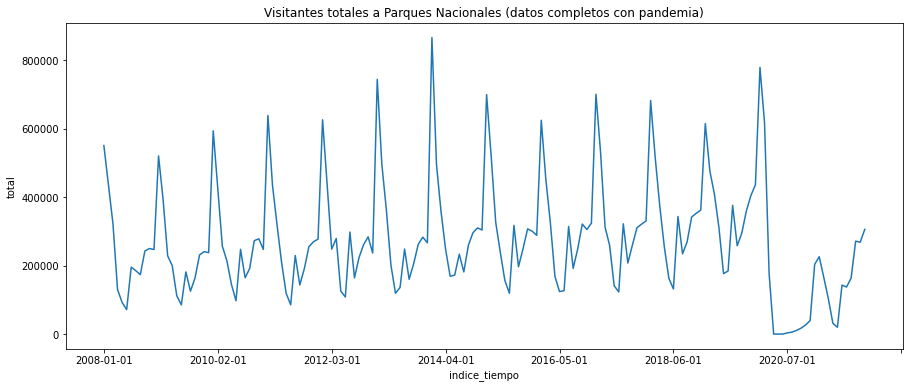

In [ ]:
data["total"].plot(figsize=(15, 6))
plt.xlabel("indice_tiempo")
plt.ylabel("total")
plt.title("Visitantes totales a Parques Nacionales (datos completos con pandemia)")
plt.show()

In [ ]:
data.drop(["2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01","2021-01-01","2021-02-01","2021-03-01","2021-04-01","2021-05-01","2021-06-01","2021-07-01","2021-08-01","2021-09-01","2021-10-01","2021-11-01","2021-12-01"],axis=0, inplace=True)

In [ ]:
dataoriginal.drop([146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167],axis=0, inplace=True)

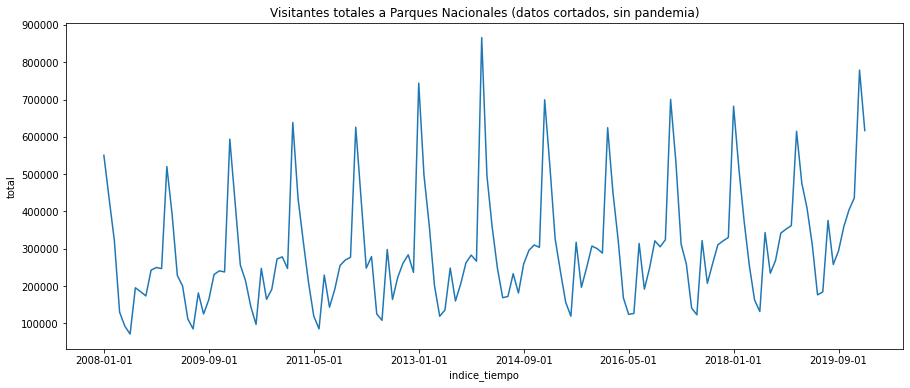

In [ ]:
data["total"].plot(figsize=(15, 6))
plt.xlabel("indice_tiempo")
plt.ylabel("total")
plt.title("Visitantes totales a Parques Nacionales (datos cortados, sin pandemia)")
plt.show()

# Prediccion de series de tiempo con el metodo promedio simple

In [ ]:
#Divido la serie de tiempo en entrenamiento y testeo 
train_len = 134
train = data[0:train_len] # Primeros 134 meses para entrenamiento
test = data[train_len:] # Ultimos 12 meses para testeo

In [ ]:
data_sma = data.copy()
ma_window = 12
data_sma['sma_forecast'] = data['total'].rolling(ma_window).mean()
data_sma['sma_forecast'][train_len:] = data_sma['sma_forecast'][train_len-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


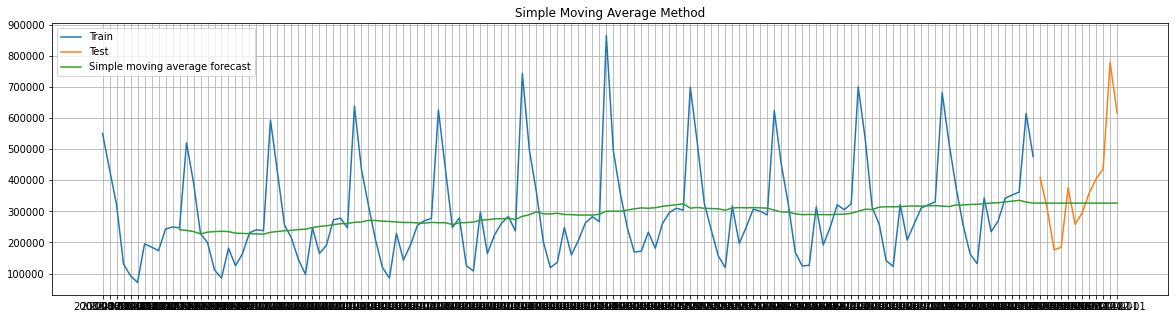

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total'], label='Train')
plt.plot(test['total'], label='Test')
plt.plot(data_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['total'], data_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['total']-data_sma['sma_forecast'][train_len:])/test['total'])*100,2)

results = pd.DataFrame({'Metodo':['Pronóstico de promedio móvil simple'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Metodo', 'RMSE', 'MAPE']]
results

,Metodo,RMSE,MAPE
0,Pronóstico de promedio móvil simple,174639.22,33.07


# Pronóstico de series de tiempo utilizando el método Naive

In [ ]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['total'][train_len-1]

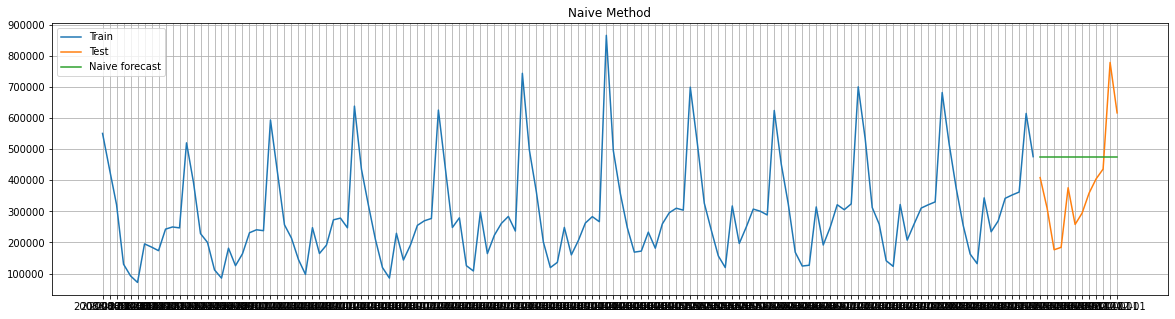

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total'], label='Train')
plt.plot(test['total'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['total'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['total']-y_hat_naive['naive_forecast'])/test['total'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,189189.78,57.66


# Prediccion de series de tiempo con el modelo naive estacional

In [ ]:
def pysnaive(train_series,seasonal_periods,forecast_horizon):

    
    if len(train_series)>= seasonal_periods: 
        
        last_season=train_series.iloc[-seasonal_periods:]
        
        reps=np.int(np.ceil(forecast_horizon/seasonal_periods))
        
        fcarray=np.tile(last_season,reps)
        
        fcast=pd.Series(fcarray[:forecast_horizon])
        
        fitted = train_series.shift(seasonal_periods)
        
    else:
        fcast=print("La duración del conjunto de entrenamiento debe ser mayor que el número de períodos estacionales") 
    
    return fitted, fcast

In [ ]:
# dividimos los datos en entrenamiento y testeo
train_len = 134
train_snv = data[0:train_len] # primeros 134 meses como entrenamiento
predictions = data[train_len:] # ultimos 12 meses

In [ ]:
#Valores ajustados
py_snaive_fit = pysnaive(train_snv["total"], 
                     seasonal_periods=12,
                     forecast_horizon=12)[0]

#pronóstico
py_snaive = pysnaive(train_snv["total"], 
                     seasonal_periods=12,
                     forecast_horizon=12)[1]

predictions["py_snaive"] = py_snaive.values 


predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,no_residentes,residentes,total,buenos_aires_no_residentes,buenos_aires_residentes,buenos_aires_total,cordoba_no_residentes,cordoba_residentes,cordoba_total,cuyo_no_residentes,...,litoral_no_residentes,litoral_residentes,litoral_total,norte_no_residentes,norte_residentes,norte_total,patagonia_no_residentes,patagonia_residentes,patagonia_total,py_snaive
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2019-03-01,152927,255746,408673,0,0,0,191,1567,1758,183,...,66916,86885,153801,2067,11771,13838,83570,152137,235707,375114
2019-04-01,104369,205724,310093,0,0,0,226,2866,3092,185,...,56806,89126,145932,1027,14713,15740,46125,95036,141161,255251
2019-05-01,53137,123390,176527,0,0,0,124,1609,1733,196,...,36541,65980,102521,711,10223,10934,15565,43785,59350,162690
2019-06-01,47408,136894,184302,0,0,0,107,1465,1572,156,...,33804,75673,109477,706,13215,13921,12635,44336,56971,131788
2019-07-01,79156,296854,376010,0,0,0,218,3410,3628,246,...,55229,172987,228216,1960,34809,36769,21503,75263,96766,343475
2019-08-01,71322,186665,257987,0,0,0,113,1159,1272,112,...,47298,100231,147529,992,18260,19252,22807,63967,86774,234412
2019-09-01,80679,213871,294550,3,1094,1097,236,2379,2615,150,...,48440,108242,156682,1075,18793,19868,30775,80557,111332,269061
2019-10-01,118561,240434,358995,10,1932,1942,240,2047,2287,187,...,58521,100324,158845,1395,19430,20825,58208,114129,172337,341995
2019-11-01,180036,224485,404521,13,2265,2278,199,1456,1655,266,...,71594,90880,162474,1435,12770,14205,106529,114687,221216,352751


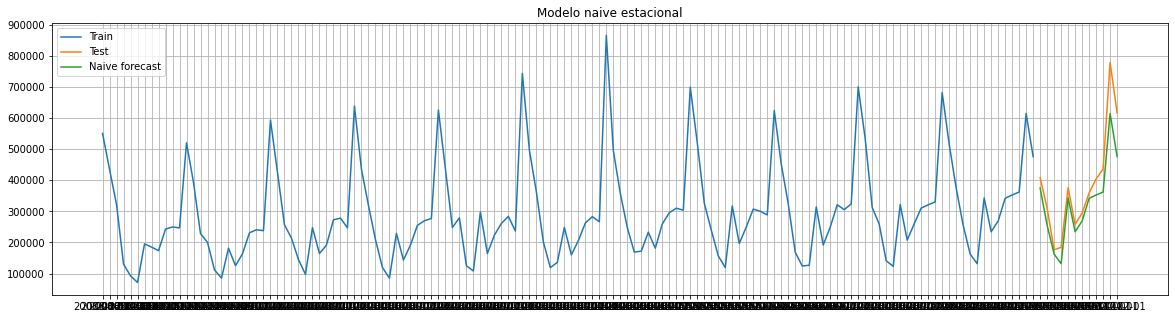

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_snv['total'], label='Train')
plt.plot(predictions['total'], label='Test')
plt.plot(predictions['py_snaive'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Modelo naive estacional')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(predictions['total'], predictions['py_snaive'])).round(2)
mape = np.round(np.mean(np.abs(predictions['total']-predictions['py_snaive'])/test['total'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

KeyError: ignored

# Prediccion de series de tiempo con el metodo "Drift"


In [ ]:
#Divido la serie de tiempo en training y test 
train_len = 134
train = data[0:train_len] # Primeros 134 meses para entrenamiento 
trainoriginal= dataoriginal[0:train_len]  # adaptacion para poder correr el metodo drift
test = data[train_len:] # Ultimos 12 meses para testeo
testoriginal = dataoriginal[train_len:] # adaptacion para poder correr el metodo drift

In [ ]:
y_t = trainoriginal.loc[len(trainoriginal)-1]['total'] 
m = (y_t - trainoriginal.loc[0]['total']) / len(trainoriginal)
y_hat_drift = testoriginal.copy().drop('total', axis=1)
h = np.linspace(0,len(y_hat_drift)-1, len(y_hat_drift))
y_hat_drift['drift_forecast'] = y_t + m * h

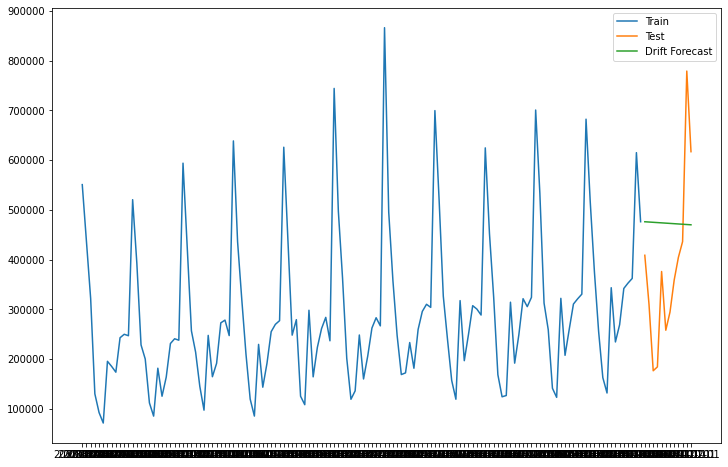

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(trainoriginal['indice_tiempo'], trainoriginal['total'], label='Train')
plt.plot(testoriginal['indice_tiempo'], testoriginal['total'], label='Test')
plt.plot(y_hat_drift['indice_tiempo'], y_hat_drift['drift_forecast'], 
        label='Drift Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testoriginal['total'], y_hat_drift['drift_forecast'])).round(2)
mape = np.round(np.mean(np.abs(testoriginal['total']-y_hat_drift['drift_forecast'])/testoriginal['total'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,188882.44,57.15


# Fin del codigo 💻